# Datasets are from kaggle

Follow this link to download the train.csv data

https://www.kaggle.com/c/titanic/data?select=train.csv

An account is required to access the data. This is the Training data set. This is used to train ML models. The test.csv file is used to test predictions.

All datasets are saved in a subdirectory named DataSets

In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('DataSets/train.csv')
#Read the file from the subdirectory

In [5]:
titanic_df.head()
#Have a look at what the dataset looks like. First 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> SibSp shows siblings and the Parch shows the number parents or children

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> This shows that Cabin has a lot of null values

### Basic questions
---
Ages? Genders? Classes?

What cities did they come from?

What deck were they on and does that relate to class?

Who were with and without family?

### Broader questions
What helped survive the sinking?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

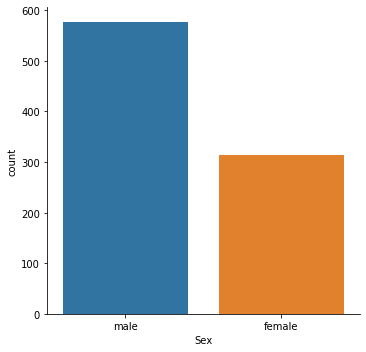

In [18]:
sns.catplot(data=titanic_df, kind="count", x="Sex")
#A lot more males than females

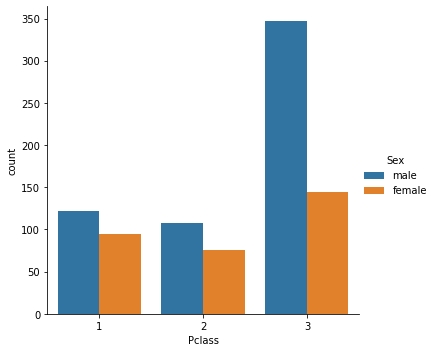

In [21]:
sns.catplot(data=titanic_df, kind="count", hue="Sex", x="Pclass")
# A lot more males in 3rd class than females

In [22]:
#Separate male females and children
def male_female_child(passenger):
    age,sex = passenger
    
    if age<18:
        return 'child'
    else:
        return sex

In [23]:
#Defining a new column
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child,axis=1)

In [24]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [35]:
titanic_df['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

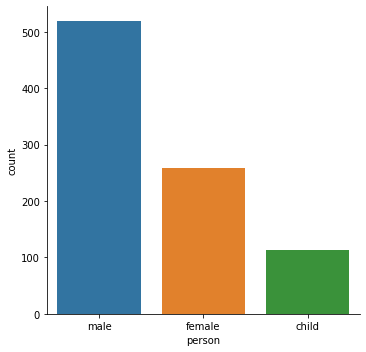

In [36]:
sns.catplot(data=titanic_df, kind='count', x='person')

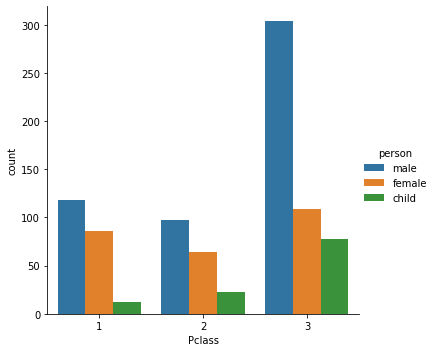

In [31]:
sns.catplot(data=titanic_df,kind='count', x='Pclass', hue='person')

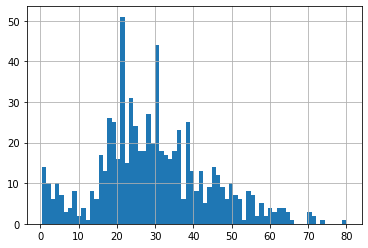

In [32]:
titanic_df['Age'].hist(bins=70)

In [ ]:
titanic